In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [2]:
df = pd.DataFrame(pd.read_parquet('/content/dataset 5000 samples .parquet'))
print(df.head())

     T  final order parameter  \
0   31               0.989297   
1  102               0.898053   
2   42               0.959576   
3   19               0.988873   
4  102               0.953256   

                                    individuals dirs  \
0  [5.216386339335419, -0.9351072624383971, -1.43...   
1  [2.266794618581111, -3.6225246327144776, 3.628...   
2  [4.574054744945118, 1.9209272482756068, 1.6752...   
3  [4.744063207818235, -1.9313296587414281, -2.09...   
4  [4.943610795222412, -1.0005063861254526, -1.18...   

                                order parameter list  net coll dir      etta  
0  [0.10646143784111824, 0.10646143784111824, 0.2...     -3.013915  0.454629  
1  [0.05043341145207883, 0.05043341145207883, 0.1...     -2.335591  1.552082  
2  [0.039040325047892975, 0.039040325047892975, 0...     -1.267465  0.979773  
3  [0.1575816401248559, 0.1575816401248559, 0.536...     -2.723721  0.327417  
4  [0.14420378106128234, 0.14420378106128234, 0.3...     -0.883281  1

In [3]:
Ts = list(df['T'])
print(Ts)

[31, 102, 42, 19, 102, 102, 23, 102, 29, 102, 43, 24, 21, 102, 102, 102, 36, 24, 20, 102, 102, 24, 31, 102, 68, 28, 24, 29, 22, 102, 48, 102, 89, 102, 102, 46, 102, 102, 102, 102, 29, 29, 29, 29, 102, 46, 102, 24, 102, 102, 29, 21, 102, 27, 102, 20, 20, 31, 59, 26, 102, 22, 102, 102, 26, 19, 37, 28, 102, 102, 23, 46, 95, 27, 21, 35, 80, 26, 102, 25, 40, 32, 102, 102, 28, 102, 28, 31, 52, 102, 102, 102, 24, 102, 23, 102, 28, 31, 58, 25, 102, 24, 102, 31, 102, 33, 33, 32, 102, 28, 102, 36, 102, 25, 59, 21, 37, 34, 64, 102, 37, 29, 102, 23, 102, 27, 31, 33, 102, 102, 102, 21, 22, 30, 22, 102, 29, 102, 102, 102, 32, 31, 48, 20, 53, 19, 102, 30, 20, 24, 45, 32, 102, 36, 37, 37, 102, 39, 26, 26, 33, 34, 99, 32, 102, 73, 102, 24, 24, 34, 27, 30, 26, 24, 40, 24, 22, 102, 102, 30, 33, 24, 102, 102, 97, 102, 55, 22, 27, 19, 42, 25, 43, 31, 102, 26, 102, 102, 102, 102, 26, 28, 102, 20, 63, 102, 57, 46, 34, 29, 40, 81, 102, 24, 48, 67, 42, 80, 24, 32, 102, 102, 87, 102, 38, 102, 22, 22, 102, 30, 3

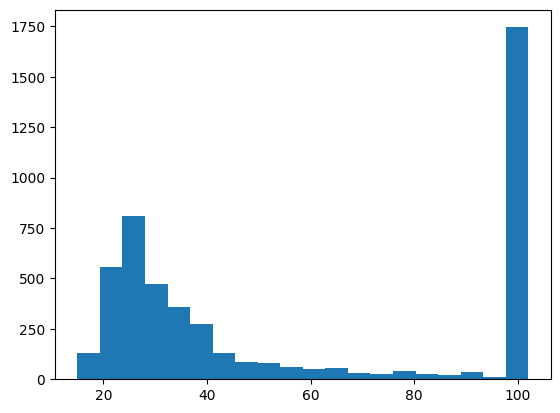

In [4]:
plt.hist(Ts, bins = 20)
plt.show()

In [19]:
i = 0
for j in df['order parameter list'] :
  if j[11] > 0.8 :
    i+=1
print(i)

3735


In [20]:
drop_list = []
for i in range(len(df)) :
  if df['order parameter list'][i][11] > 0.8 :
    drop_list.append(i)
print(len(drop_list))

3735


In [21]:
cleaned_df = df.drop(df.index[drop_list])

In [24]:
print(cleaned_df)
print(len(cleaned_df))

        T  final order parameter  \
1     102               0.898053   
5     102               0.916999   
7     102               0.931414   
10     43               0.975111   
14    102               0.940792   
...   ...                    ...   
4977   27               0.979920   
4979   29               0.975225   
4981   37               0.979102   
4991   36               0.996607   
4995  102               0.942311   

                                       individuals dirs  \
1     [2.266794618581111, -3.6225246327144776, 3.628...   
5     [1.6456431974185277, 0.10851056346180118, 0.18...   
7     [6.248970176275564, -1.6640921925042296, -1.02...   
10    [6.238853553359655, 3.153475972739867, 2.84209...   
14    [3.839308267098966, -0.17357940929611315, 0.39...   
...                                                 ...   
4977  [3.060835144926738, -1.235262498235678, -1.732...   
4979  [4.039480614580903, 2.824815697634558, 3.22472...   
4981  [1.1429641053189261, -0.146835

In [32]:
dataset = [ i[:10] for i in cleaned_df['individuals dirs'] ]
labels = [ j for j in cleaned_df['net coll dir'] ]

In [33]:
X = dataset
Y = labels
print(len(X))
print(len(Y))

1265
1265


In [36]:
np.savez('prepared dataset net collective dir prediction.npz', matrix=X, mylist=Y)

In [35]:
print(min(Y))
print(max(Y))

-3.1297918244070533
3.07729475638707
